Logistic Regression Implementation: The goal of this assignment is to give you hands-on experience with logistic regression (binary) and softmax regression (multi-class). Please download
the provided Iris dataset (120 training samples, 30 test samples). Each sample has two features and
a label in {0, 1, 2}, corresponding to: 0: Iris setosa; 1: Iris versicolor; 2: Iris virginica. The files
X train.csv and X test.csv contain the features (two columns), and y train.csv and
y test.csv contain the labels (one column).


1. Logistic Regression for Binary Classification: Train a model to classify setosa vs. nonsetosa samples. First, convert all labels of 1 and 2 into 1 (so 0 remains 0; 1 and 2 become
1). Then train a logistic regression model using LogisticRegression in scikit-learn on the
training set. Report the learnt coefficients. Report classification accuracies on the training
set and on the test set. Plot the training samples (different colors for the two classes) and plot
the decision boundary.

2. Logistic Regression with Softmax for Multi-class Classification: Use the original 3-class
labels {0, 1, 2} and train a logistic regression model with multi class=‘multinomial’
(softmax) on the training set. Report the learnt coefficients. Report classification accuracies
on the training set and on the test set. Plot the training samples (three distinct colors for the
three classes) and plot the decision boundaries (you will have three boundaries, one for each
pair of classes).


In [105]:
import pandas as pd

In [106]:
x_train = pd.read_csv("X_train.csv", header=None)
x_test = pd.read_csv("X_test.csv", header=None)
y_train = pd.read_csv("y_train.csv", header=None)
y_test = pd.read_csv("y_test.csv", header=None)

In [107]:
# Each sample has two features and a label in {0, 1, 2}, corresponding to: 
# 0: Iris setosa; 1: Iris versicolor; 2: Iris virginica. 
# The files X train.csv and X test.csv contain the features (two columns)
# y train.csv and y test.csv contain the labels (one column)

In [108]:
# verify correct data loading
print(x_train)
print(y_train.value_counts())
print(y_test.value_counts())

            0         1
0    2.705256 -1.031238
1    3.233198 -1.586253
2   -0.249094 -4.742310
3    2.126066 -1.602704
4    2.111766 -1.316971
..        ...       ...
115 -0.270544 -4.321936
116  0.272897 -4.955746
117  2.357262 -1.221726
118 -0.378993 -4.282538
119 -0.821135 -6.446755

[120 rows x 2 columns]
0  
1.0    41
0.0    40
2.0    39
Name: count, dtype: int64
0  
2.0    11
0.0    10
1.0     9
Name: count, dtype: int64


In [109]:
# 1. Logisitic regression with Binary Classification:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# First, convert all labels of 1 and 2 into 1 
    # 0 remains 0, 1 and 2 become 1:
binary_y_train = y_train.replace(2, 1)
binary_y_test = y_test.replace(2, 1)

print(binary_y_train.value_counts())
print(binary_y_test.value_counts())

0  
1.0    80
0.0    40
Name: count, dtype: int64
0  
1.0    20
0.0    10
Name: count, dtype: int64


In [110]:
# Train a logistic regression model on the training data
model = LogisticRegression()

model.fit(x_train, binary_y_train.values.ravel())

binary_y_train_pred = model.predict(x_train)

# a. Report Training set predictions and accuracy:
print("Predictions on training set: \n", binary_y_train_pred)
print("Ground Truth: \n", binary_y_train.values.ravel())
accuracy_train = accuracy_score(binary_y_train.values.ravel(), binary_y_train_pred)

# get any inaccurate index
inaccurate_indices = [i for i in range(len(binary_y_train_pred)) if binary_y_train_pred[i] != binary_y_train.values.ravel()[i]]
if inaccurate_indices:
	inaccurate_index = inaccurate_indices[0]
	print(f"Training Accuracy: {accuracy_train:.2f}", "where the inaccuracy is at index: ", inaccurate_index, "and the prediction is: ", binary_y_train_pred[inaccurate_index], "while the ground truth is: ", binary_y_train.values.ravel()[inaccurate_index])
else:
	print(f"Training Accuracy: {accuracy_train:.2f}", "No inaccuracies found.")

# b. Report Test set predictions and accuracy:
binary_y_pred_test = model.predict(x_test)
print("Predictions on the test set: \n", binary_y_pred_test)
print("Ground Truth: \n", binary_y_test.values.ravel())
# Calculate accuracy
accuracy = accuracy_score(binary_y_test, binary_y_pred_test)
print(f"Accuracy: {accuracy:.2f}")

# report the learned coefficients:
print("Coefficients: \n", model.coef_)
print("Intercept: \n", model.intercept_)


Predictions on training set: 
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
Ground Truth: 
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.]
Training Accuracy: 1.00 No inaccuracies found.
Predictions on the test set: 
 [1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0.]
Ground Truth: 
 [1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 

C:\Users\koola\AppData\Local\Temp\ipykernel_33764\184396666.py:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=binary_y_test.values.ravel(), edgecolors='k', marker='x', label='Test data')


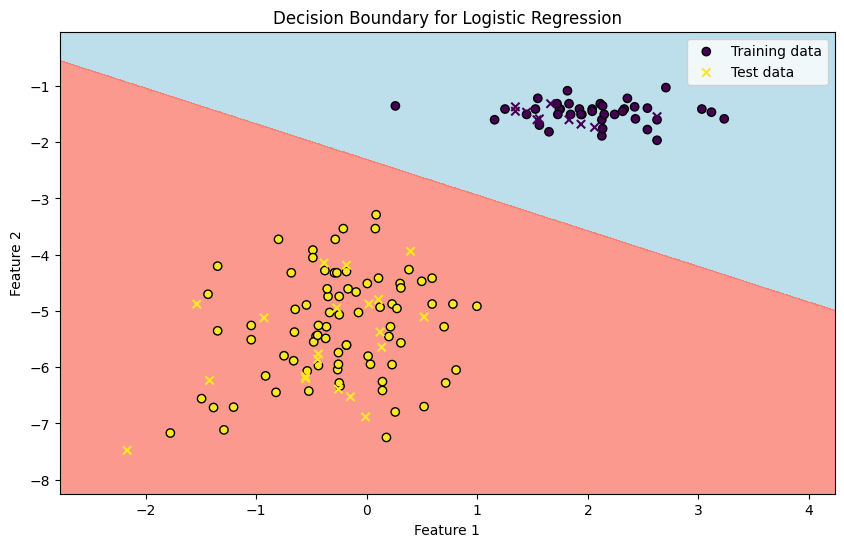

In [111]:
# Plot decision boundaries:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a mesh grid for plotting decision boundaries
x_min, x_max = x_train.iloc[:, 0].min() - 1, x_train.iloc[:, 0].max() + 1
y_min, y_max = x_train.iloc[:, 1].min() - 1, x_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('lightblue', 'salmon')))
plt.scatter(x_train.iloc[:, 0], x_train.iloc[:, 1], c=binary_y_train.values.ravel(), edgecolors='k', marker='o', label='Training data')
plt.scatter(x_test.iloc[:, 0], x_test.iloc[:, 1], c=binary_y_test.values.ravel(), edgecolors='k', marker='x', label='Test data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for Logistic Regression')
plt.legend()
plt.show()


In [112]:
# 2. Logistic regression with Multi-class Classification:

# Train a logisitic regression model with multi_class = 'multinomial' (softmax) on the training set. # solver = liblinear
model_multi = LogisticRegression(multi_class='multinomial')

### TRAINING ###
# predict
y_pred_train_multi = model_multi.fit(x_train, y_train.values.ravel()).predict(x_train)

# accuracy:
accuracy_train_multi = accuracy_score(y_train.values.ravel(), y_pred_train_multi)

# get any inaccurate index
inaccurate_indices_multi = [i for i in range(len(y_pred_train_multi)) if y_pred_train_multi[i] != y_train.values.ravel()[i]]
if inaccurate_indices_multi:
	print(f"Training Accuracy: {accuracy_train_multi:.2f}")
	for i in inaccurate_indices_multi:
		print("Inaccuracy at index: ", i, "Precition: ", y_pred_train_multi[i], "Ground Truth: ", y_train.values.ravel()[i])
else:
	print(f"Training Accuracy: {accuracy_train_multi:.2f}", "No inaccuracies found.")

### TESTING ###
# predict
y_pred_test_multi = model_multi.predict(x_test)
# get any inaccurate index
print("Predictions on the test set: \n", y_pred_test_multi)
print("Ground Truth: \n", y_test.values.ravel())
print("Testing Accuracy: ", accuracy_score(y_test.values.ravel(), y_pred_test_multi))

# report the learned coefficients:
print("Coefficients: \n", model_multi.coef_)
print("Intercept: \n", model_multi.intercept_)


Training Accuracy: 0.96
Inaccuracy at index:  42 Precition:  1.0 Ground Truth:  2.0
Inaccuracy at index:  54 Precition:  2.0 Ground Truth:  1.0
Inaccuracy at index:  62 Precition:  2.0 Ground Truth:  1.0
Inaccuracy at index:  81 Precition:  1.0 Ground Truth:  2.0
Inaccuracy at index:  116 Precition:  1.0 Ground Truth:  2.0
Predictions on the test set: 
 [1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0.]
Ground Truth: 
 [1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0.]
Testing Accuracy:  1.0
Coefficients: 
 [[ 1.12393584  2.22919459]
 [-0.55527035  0.60345908]
 [-0.56866549 -2.83265367]]
Intercept: 
 [  8.24510483   4.97429404 -13.21939886]


C:\Users\koola\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [113]:
# compare coefficients:
print("MULTI MODEL")
print("Coefficients: \n", model_multi.coef_)
print("Intercept: \n", model_multi.intercept_)
print("\nBINARY MODEL")
print("Coefficients: \n", model.coef_)
print("Intercept: \n", model.intercept_)


MULTI MODEL
Coefficients: 
 [[ 1.12393584  2.22919459]
 [-0.55527035  0.60345908]
 [-0.56866549 -2.83265367]]
Intercept: 
 [  8.24510483   4.97429404 -13.21939886]

BINARY MODEL
Coefficients: 
 [[-1.25281816 -1.97743888]]
Intercept: 
 [-4.56474599]


C:\Users\koola\AppData\Local\Temp\ipykernel_33764\2490802713.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[0], x_test[1], c=y_test.values.ravel(), edgecolors='k', marker='x', label='Test data')


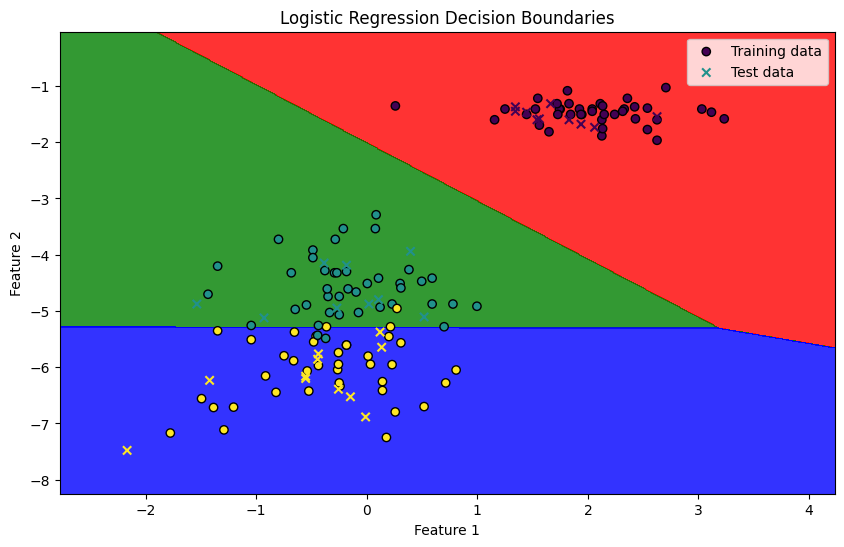

In [114]:
# Plot decision boundaries:

# Create a mesh grid for plotting decision boundaries
x_min, x_max = x_train[0].min() - 1, x_train[0].max() + 1
y_min, y_max = x_train[1].min() - 1, x_train[1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model_multi.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(x_train[0], x_train[1], c=y_train.values.ravel(), edgecolors='k', marker='o', label='Training data')
plt.scatter(x_test[0], x_test[1], c=y_test.values.ravel(), edgecolors='k', marker='x', label='Test data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundaries')
plt.legend()
plt.show()